In [1]:
using Posets

import Distributions: MvNormal

using Plots

using LinearAlgebra

# Definciones: metodos y variables

In [2]:
dimension = 2
numeronodos= 4

4

In [3]:
mat = [1. .3; .3 1.]
matsesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

In [4]:
function metametodo(metodo, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    [energia_local(r, poset) for r in ranks]
end
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end

metametodo_poset (generic function with 1 method)

In [5]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)
corte0p98 = x -> αcut_poset(x |>fuzzy, 0.98)

#15 (generic function with 1 method)

In [6]:
metodom2 = x -> x |> m2 |> pareja_matrizadyacencia
metodom3 = x -> x |> m3 |> pareja_matrizadyacencia

#19 (generic function with 1 method)

# Datos

In [7]:
ejemplo = [generapuntuaciones_gaussian(20,7,2)[2] for _ in 1:10^3];

In [8]:
anima_corte0p98 = [metametodo(corte0p98, ej, true) for ej in ejemplo];
anima_corte0p95 = [metametodo(corte0p95, ej, true) for ej in ejemplo];

anima_corte0p90 = [metametodo(corte0p90, ej, true) for ej in ejemplo];

anima_corte0p80 = [metametodo(corte0p80, ej, true) for ej in ejemplo];

In [9]:
anima_metodom2 = [metametodo(metodom2, ej, true) for ej in ejemplo];

In [10]:
anima_metodom3 = [metametodo(metodom3, ej, true) for ej in ejemplo];

In [11]:
ejemplo_sinruido_sesgo = [generapuntuaciones_gaussian(20,7,2;matnodos=matsesgada)[2] for _ in 1:10^3];

In [12]:
anima_corte0p98_sinruido_sesgo = [metametodo(corte0p98, ej, true) for ej in ejemplo_sinruido_sesgo];
anima_corte0p95_sinruido_sesgo = [metametodo(corte0p95, ej, true) for ej in ejemplo_sinruido_sesgo];
anima_corte0p90_sinruido_sesgo = [metametodo(corte0p90, ej, true) for ej in ejemplo_sinruido_sesgo];
anima_corte0p80_sinruido_sesgo = [metametodo(corte0p80, ej, true) for ej in ejemplo_sinruido_sesgo];

In [13]:
anima_metodom2_sinruido_sesgo = [metametodo(metodom2, ej, true) for ej in ejemplo_sinruido_sesgo];

In [14]:
anima_metodom3_sinruido_sesgo = [metametodo(metodom3, ej, true) for ej in ejemplo_sinruido_sesgo];

In [15]:
ejemplo_ruido = [generapuntuaciones_gaussian(20,7,2;ruido=true)[2] for _ in 1:10^3];

In [16]:
anima_corte0p98_ruido = [metametodo(corte0p98, ej, true) for ej in ejemplo_ruido];
anima_corte0p95_ruido = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido];
anima_corte0p90_ruido = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido];
anima_corte0p80_ruido = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido];

In [17]:
anima_metodom2_ruido = [metametodo(metodom2, ej, true) for ej in ejemplo_ruido];

In [18]:
anima_metodom3_ruido = [metametodo(metodom3, ej, true) for ej in ejemplo_ruido];

In [19]:
ejemplo_ruido_sesgo = [generapuntuaciones_gaussian(20,7,2;ruido=true,matnodos=matsesgada)[2] for _ in 1:10^3];

In [20]:
anima_corte0p98_ruido_sesgo = [metametodo(corte0p98, ej, true) for ej in ejemplo_ruido_sesgo];
anima_corte0p95_ruido_sesgo = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido_sesgo];
anima_corte0p90_ruido_sesgo = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido_sesgo];
anima_corte0p80_ruido_sesgo = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido_sesgo];

In [21]:
anima_metodom2_ruido_sesgo = [metametodo(metodom2, ej, true) for ej in ejemplo_ruido_sesgo];

In [22]:
anima_metodom3_ruido_sesgo = [metametodo(metodom3, ej, true) for ej in ejemplo_ruido_sesgo];

In [23]:
ejemplo_miniruido_sesgo = [generapuntuaciones_gaussian(20,7,2;ruido=true,matnodos=matsesgada, matruido = nmat)[2] for _ in 1:10^3];

In [24]:
anima_corte0p98_miniruido_sesgo = [metametodo(corte0p98, ej, true) for ej in ejemplo_miniruido_sesgo];
anima_corte0p95_miniruido_sesgo = [metametodo(corte0p95, ej, true) for ej in ejemplo_miniruido_sesgo];
anima_corte0p90_miniruido_sesgo = [metametodo(corte0p90, ej, true) for ej in ejemplo_miniruido_sesgo];
anima_corte0p80_miniruido_sesgo = [metametodo(corte0p80, ej, true) for ej in ejemplo_miniruido_sesgo];

In [25]:
anima_metodom2_miniruido_sesgo = [metametodo(metodom2, ej, true) for ej in ejemplo_miniruido_sesgo];

In [26]:
anima_metodom3_miniruido_sesgo = [metametodo(metodom3, ej, true) for ej in ejemplo_miniruido_sesgo];

# Resultados

Se comparan los valores de __enegia local__ para distintos valores de $\alpha$ asi como
con distintos valores de __ruido__ tanto para los puntos-nodos como para la comparativa.

Conclusión: si se introduce sesgo no importa el ruido.

### Corte alfa = 0.80

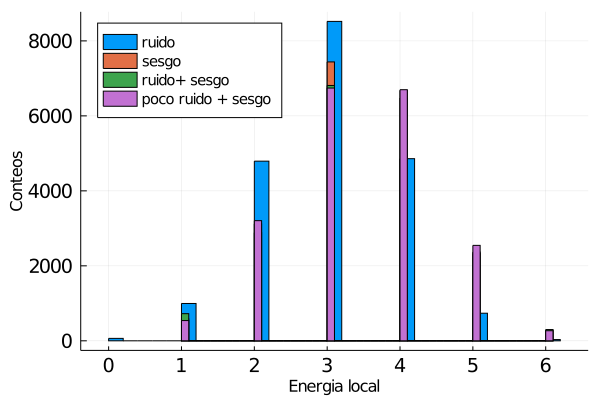

In [27]:
histogram([vcat(anima_corte0p80_ruido...), vcat(anima_corte0p80_sinruido_sesgo...), vcat(anima_corte0p80_ruido_sesgo...), vcat(anima_corte0p80_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],
legend = :topleft,legendfontsize=10)

### Corte alfa = 0.95

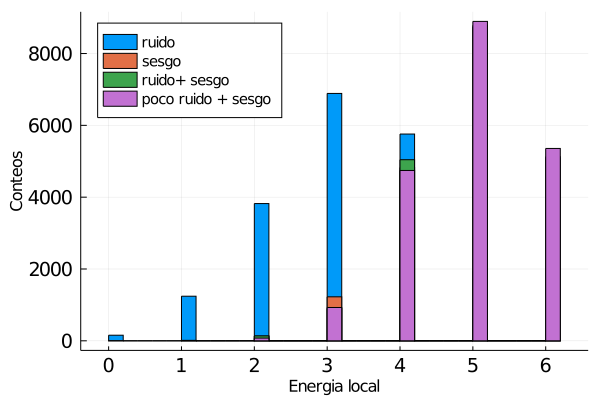

In [28]:
histogram([vcat(anima_corte0p95_ruido...), vcat(anima_corte0p95_sinruido_sesgo...),vcat(anima_corte0p95_ruido_sesgo...), vcat(anima_corte0p95_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

### Corte alfa = 0.98

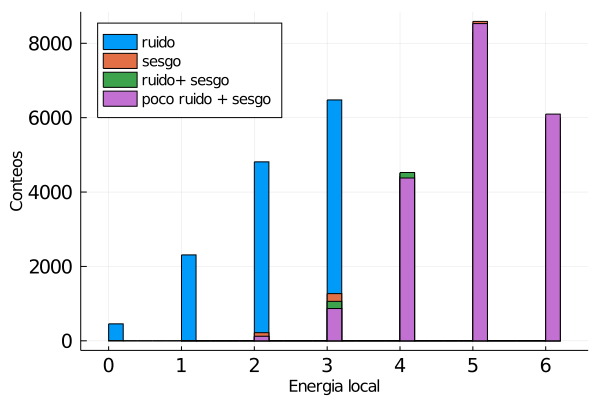

In [29]:
histogram([vcat(anima_corte0p98_ruido...), vcat(anima_corte0p98_sinruido_sesgo...),vcat(anima_corte0p98_ruido_sesgo...), vcat(anima_corte0p98_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
    xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

### metodo m2

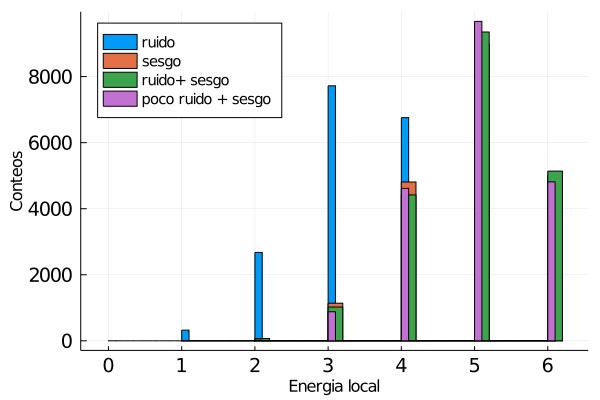

In [30]:
histogram([vcat(anima_metodom2_ruido...), vcat(anima_metodom2_sinruido_sesgo...),vcat(anima_metodom2_ruido_sesgo...), vcat(anima_metodom2_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
    xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

### metodo m3

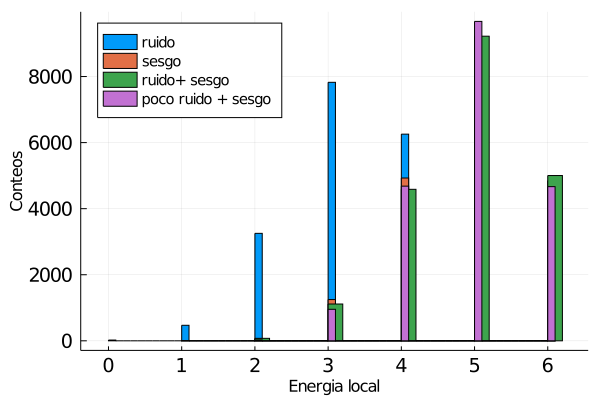

In [31]:
histogram([vcat(anima_metodom3_ruido...), vcat(anima_metodom3_sinruido_sesgo...),vcat(anima_metodom3_ruido_sesgo...), vcat(anima_metodom3_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
    xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

# Analisis sesgo usando norma posets

In [32]:
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end

metametodo_poset (generic function with 1 method)

In [33]:
mat = [1. .3; .3 1.]
matcesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

## Sesgo $\alpha = 70$

In [34]:
sesgo_70pts=Float64[]

sinsesgo_70pts=Float64[]

Float64[]

In [35]:
for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2;matnodos=matcesgada)
    push!(sesgo_70pts, metametodo_poset(corte0p70, pdp, puntos, true))
end

for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2)
    push!(sinsesgo_70pts, metametodo_poset(corte0p70, pdp, puntos, true))
end

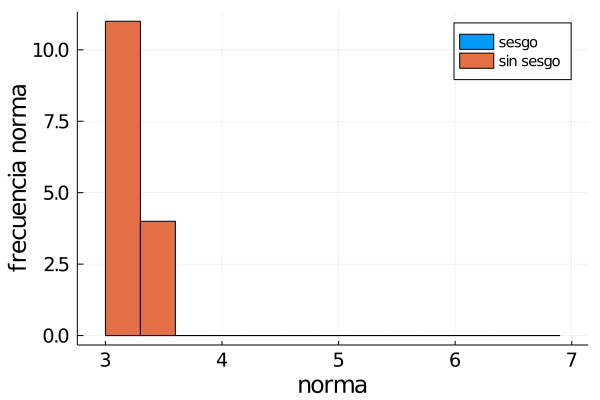

In [36]:
histogram([sesgo_70pts,sinsesgo_70pts],bins=3:0.3:7,labels=["sesgo" "sin sesgo"], xtickfontsize=13, ytickfontsize=13, xguidefontsize=16, yguidefontsize=16, legendfontsize=10,xlabel="norma", ylabel="frecuencia norma")

## Sesgo $\alpha = 80$

In [38]:
sesgo_80pts=Float64[]

sinsesgo_80pts=Float64[]

Float64[]

In [39]:
for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2;matnodos=matcesgada)
    push!(sesgo_80pts, metametodo_poset(corte0p80, pdp, puntos, true))
end

for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2)
    push!(sinsesgo_80pts, metametodo_poset(corte0p80, pdp, puntos, true))
end

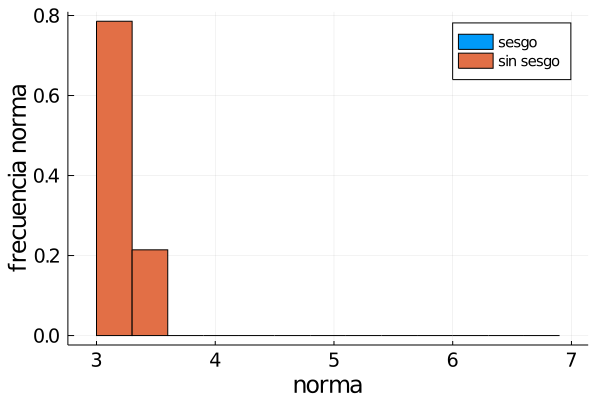

In [40]:
histogram([sesgo_80pts,sinsesgo_80pts],labels=["sesgo" "sin sesgo"],bins=3:0.3:7,normalize=:probability, xtickfontsize=13, ytickfontsize=13, xguidefontsize=16, yguidefontsize=16, legendfontsize=10,xlabel="norma", ylabel="frecuencia norma")

## Sesgo $\alpha = 95$

In [41]:
sesgo_95pts=Float64[]

sinsesgo_95pts=Float64[]

Float64[]

In [42]:
for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2;matnodos=matcesgada)
    push!(sesgo_95pts, metametodo_poset(corte0p95, pdp, puntos, true))
end

for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2)
    push!(sinsesgo_95pts, metametodo_poset(corte0p95, pdp, puntos, true))
end

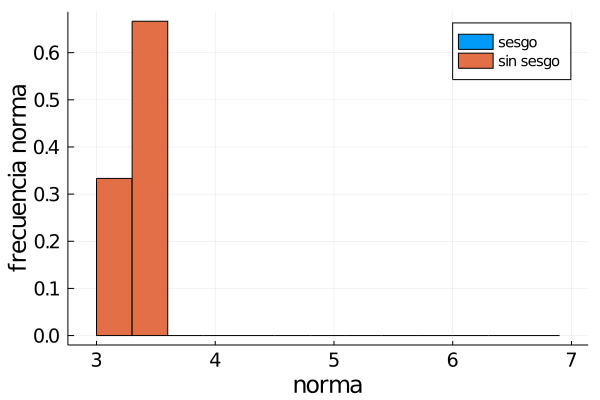

In [43]:
histogram([sesgo_95pts,sinsesgo_95pts],labels=["sesgo" "sin sesgo"],bins=3:0.3:7,normalize=:probability, xtickfontsize=13, ytickfontsize=13, xguidefontsize=16, yguidefontsize=16, legendfontsize=10,xlabel="norma", ylabel="frecuencia norma")

# Analisis de las distribuciones

In [ ]:
mat = [1. .3; .3 1.]
matcesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

In [ ]:
puntos_sesgo = rand(MvNormal([0 for _ in 1:2],matcesgada),10^3)

In [ ]:
puntos_normal = rand(MvNormal([0 for _ in 1:2],mat),10^3)

In [ ]:
puntos_miniruido = rand(MvNormal([0 for _ in 1:2],nmat),10^3)

In [ ]:
scatter( [(puntos_sesgo[:,i][1],puntos_sesgo[:,i][2]) for i in 1:10^3],ratio = :equal)

In [ ]:
scatter( [(puntos_normal[:,i][1],puntos_normal[:,i][2]) for i in 1:10^3],ratio = :equal)